- 흐름 :
1. 강화학습에서 벨만 방정식까지 흘러옴.
2. 벨만 방정식에서 (벨만 방정식과 벨만 최적 방정식) 이 있는데 둘 다 상태가 많아지면 방정식을 풀기 어려워짐.
3. 특히 벨만 최적 방정식은 max 함수 때문에 비선형 연립 방정식으로 더욱 계산 힘듦.
4. 이를 풀기 위한 알고리즘으로 동적 프로그래밍을 도입
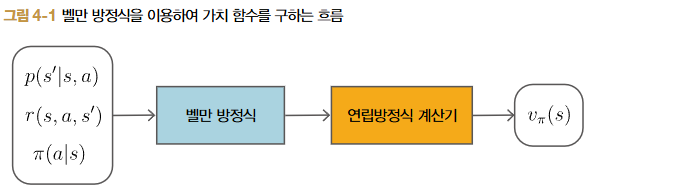

# 
#### 동적 프로그래밍 Dynamic Programming
- 복잡한 문제를 여러 개의 작은 하위 문제로 나누어 해결하는 방식
- 핵심 아이디어 :
    1. 쪼개기 : 큰 문제를 쪼개면 중복되는 하위 문제들이 반복해서 나타나는 경우가 많음.
    2. 결과 재활용 : 반복되는 하위 문제를 한 번만 계산한 후 저장하여 불러다 쓰면 계산 효율적임.   
그리고 전체 문제의 최적해가 하위 문제의 최적해들로 구성될 수 있다는 특징 사용.
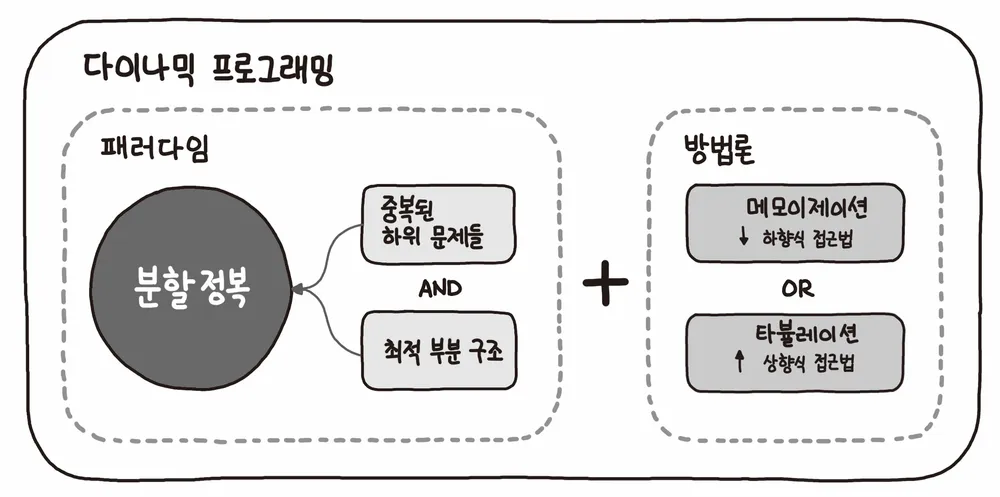
대표적 예시 : 피보나치 수열

In [1]:
def fibonacci_recursive(n):
    if n <= 1:
        return n
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

# 예시
print(fibonacci_recursive(0))  # 0
print(fibonacci_recursive(1))  # 1
print(fibonacci_recursive(2))  # 1
print(fibonacci_recursive(3))  # 2
print(fibonacci_recursive(4))  # 3
print(fibonacci_recursive(5))  # 5
print(fibonacci_recursive(10)) # 55

0
1
1
2
3
5
55


# 
# 
### 4.1 동적 프로그래밍과 정책 평가
강화학습은 결국 에이전트의 행동 혹은 정책이 중요하며 아래 2가지가 관심사
1. 해당 정책이 얼마나 가치 있는가?
2. 제일 좋은 정책이 무엇인가?

#### 용어 :
1. 정책 평가(Policy evaluation) : 정책이 주어졌을 때 가치 함수 구하는 것
2. 정책 제어(Policy control) : 최적 정책 만들어내는 것

이 두가지를 연립 방정식으로 계산하는 것이 어려울 때 동적 프로그래밍 방법으로 해결할 수 있음

## 
#### 4.1.1 동적 프로그래밍 기초
- 에이전트의 정책을 평가하기위해 벨만 방정식까지 유도 후 동적 프로그래밍 알고리즘을 사용해볼 것임

복습 : 가치함수를 벨만 방정식으로 표현까지

1. 가치함수
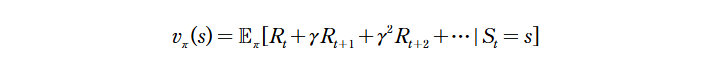
-> 무한대 -> 탈출 방법 -> 2.벨만 방정식
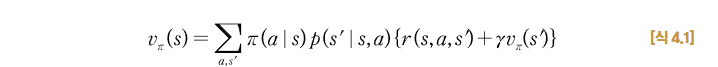
그리고 벨만 방정식의 의미는 1. 현재 상태 s의 가치함수 $v_\pi(s)$ 와 다음 상태 $s'$ 의 가치함수 $v_\pi(s')$ 의 관계를 나타냄

## 
이를 값을 점진적으로 갱신해나가는 동적프로그래밍 방법 중 하나로 풀어보자
#### 아이디어는 임의의 값을 초기에 넣고 점진적으로 값을 개선해나가는 방법임. 업데이트 수식은 아래와 같음.
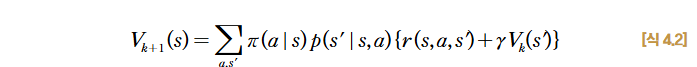
해석 :
- $V_{k+1}(s)$ 은 $k+1$ 번째로 갱신된 가치함수
- $V_{k}(s)$ 은 $k$ 번째로 갱신된 가치함수
- 이때 $V$ 가 대문자는 실제 가치 함수 $v(s)$ 와 차이를 두기 위한 추정치로써 표기(실제 값이 아니라 추정한 것이므로)

- 식 4.2를 주의있게 쳐다보면
1. $k$ 과 $k+1$ 순서가 있고
2. 현재 상태 $s$ 와 다음 상태 $s'$ 이 있음.
3. $k$ 번째에서 다음 상태 $s'$ 의 가치함수를 추정한 $V_k(s')$ 값으로 
4. $k+1$ 번째의 현재 상태 $s$의 가치함수의 추정치인 $V_{k+1}(s)$ 을 업데이트하겠다는 것임.

- 반복적 정책 평가 알고리즘 Step   
1. $V_0(s) $ 초깂값 설정, 예: $V_0(s)=0$
2. 식 4.2를 사용하여 $V_0(s)$ 에서 $V_1(s)$ 로 갱신, 이어서 $V_1(s)$ 에서 $V_2(s)$로 갱신, 이 일을 반복
3. 특정 임계값 혹은 수렴할 때 까지 반복

#### 질문 :
1. 임의의 값을 초깃값으로 설정하고 위 알고리즘을 수행하여 찾은 답은 최적해를 보장하는가?
2. 반복적 갱신이 이뤄지는데 수렴하는가? 무한 번 반복되지않는가?
3. 초깃값을 다른 임의의 값으로 설정해도 같은 값으로 수렴하는가?

# 
#### 4.1.2 반복적 정책 평가 알고리즘 첫 번째 ver 구현 방법
두 칸짜리 그리드월드 문제를 풀어보자

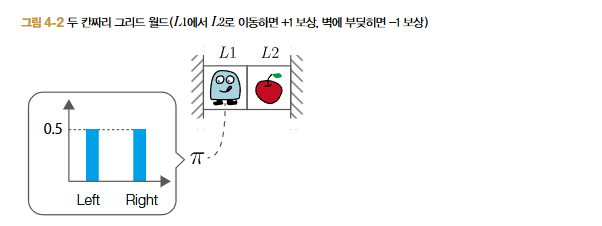
1. 에이전트는 각 상태에서 왼쪽, 오른쪽 2개만 행동할 수 있고 50% 확률로 행동함.
2. 행동하면 다음 상태는 결정적으로 정해짐

이를 반복적 정책 평가 수식에 대입
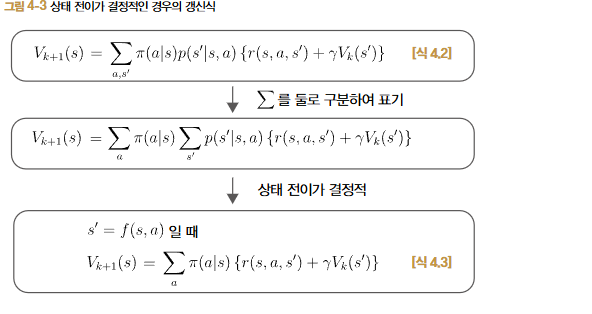

먼저 손으로 계산해보고 이후에 코드로 구현해보자

Step 1. 초기화
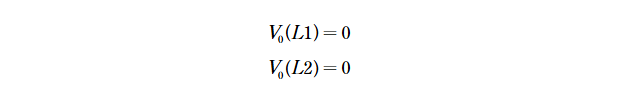
Step 2. $ V_1(L1)$ 과 $V_1(L2)$ 계산, 할인율($\gamma=0.9$)
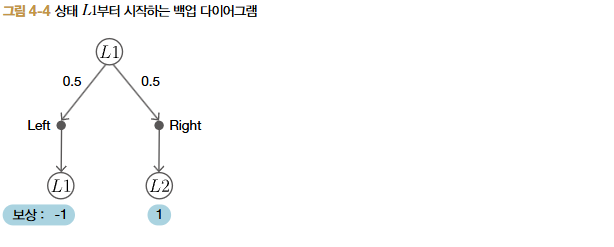
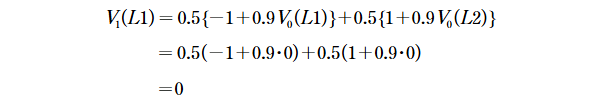
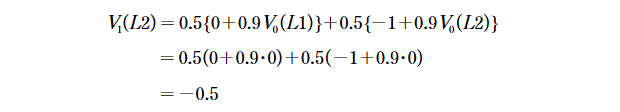
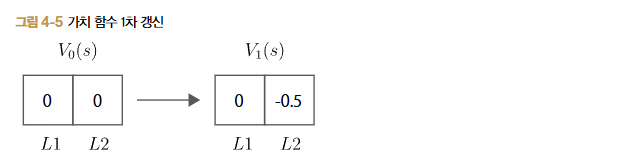
Step 3. 계속 반복

#### 첫 번째 ver 구현 방법 : 각 단계에서 변화된 계산 영향을 끼치지 않기 위해 copy 함수 사용 구현
copy 함수를 사용하면 별개의 객체로 만들어짐.

In [1]:
V = {'L1' : 0.0, 'L2' : 0.0}
new_V = V.copy() # V의 복사본

for _ in range(100):
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    V = new_V.copy()
    print(V)

{'L1': 0.0, 'L2': -0.5}
{'L1': -0.22499999999999998, 'L2': -0.725}
{'L1': -0.42749999999999994, 'L2': -0.9274999999999999}
{'L1': -0.6097499999999999, 'L2': -1.10975}
{'L1': -0.7737750000000001, 'L2': -1.273775}
{'L1': -0.9213975000000002, 'L2': -1.4213975}
{'L1': -1.05425775, 'L2': -1.55425775}
{'L1': -1.1738319750000001, 'L2': -1.6738319750000001}
{'L1': -1.2814487775, 'L2': -1.7814487775}
{'L1': -1.3783038997500001, 'L2': -1.8783038997500001}
{'L1': -1.4654735097750002, 'L2': -1.965473509775}
{'L1': -1.5439261587975002, 'L2': -2.0439261587975004}
{'L1': -1.61453354291775, 'L2': -2.11453354291775}
{'L1': -1.6780801886259753, 'L2': -2.1780801886259753}
{'L1': -1.735272169763378, 'L2': -2.2352721697633777}
{'L1': -1.7867449527870403, 'L2': -2.28674495278704}
{'L1': -1.833070457508336, 'L2': -2.3330704575083363}
{'L1': -1.8747634117575025, 'L2': -2.3747634117575025}
{'L1': -1.9122870705817523, 'L2': -2.412287070581752}
{'L1': -1.9460583635235769, 'L2': -2.446058363523577}
{'L1': -1.9764

이번에는 임계값 0.0001을 주어 이 값보다 작아질때까지 반복하는 방법

In [2]:
V = {'L1' : 0.0, 'L2' : 0.0}
new_V = V.copy()

cnt = 0 # 갱신횟수 기록
while True :
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])

    delta = abs(new_V['L1'] - V['L1'])
    delta = max(delta, abs(new_V['L2'] - V['L2']) )

    V = new_V.copy()
     
    cnt += 1
    if delta < 0.0001:
        print(V)
        print("갱신 횟수 : ", cnt)
        break

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
갱신 횟수 :  76


# 
#### 4.1.3 반복적 정채 평가 알고리즘 두 번째 ver 구현 방법
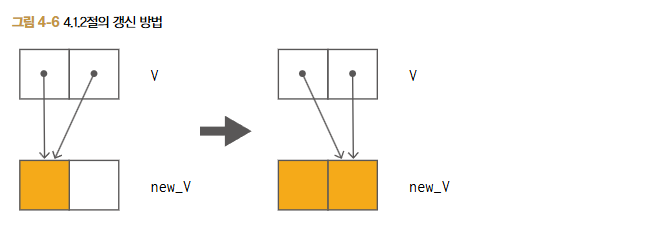
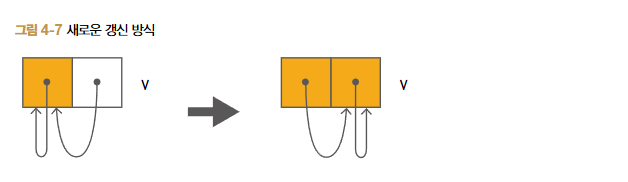

In [3]:
V = {'L1' : 0.0, 'L2' : 0.0}

cnt = 0
while True :
    t = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    delta = abs(t - V['L1'])
    V['L1'] = t

    t = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    delta = max(delta, abs(t - V['L2']))
    V['L2'] = t

    cnt += 1
    if delta < 0.0001 :
        print(V)
        print("갱신 횟수 : ", cnt)
        break


{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
갱신 횟수 :  60


질문 : 이렇게 해도 해를 찾는 것에 문제가 없을까?

# 
# 
### 4.2 좀더 복잡한 3X4 그리드월드 문제
- 벨만 방정식을 동적프로그래밍으로 푸는 이유는 좀 더 복잡한 문제를 풀기위해서였음.
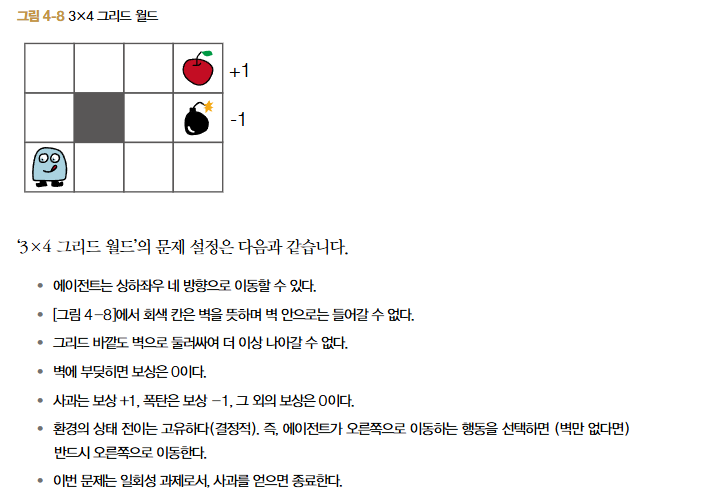

#### 
GridWorld 클래스 코드는 다음 사이트에 있음 : 
https://github.com/WegraLee/deep-learning-from-scratch-4
- 간단한 구현 정도를 보고, 이후에는 이러한 에이전트와 환경을 담은 코드는 해당 사이트의 common 폴더에 있음.
- 지금은 그냥 코드를 다 가져와봄
- 강화학습에서 환경과 에이전트의 action, state, reward 를 모두 알고 있는 경우 이렇게 구현할 수 있는 정도를 알면됨.

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


class GridWorld:
    def __init__(self):
        self.action_space = [0, 1, 2, 3]  # 행동 공간(가능한 행동들)
        self.action_meaning = {  # 행동의 의미
            0: "UP",
            1: "DOWN",
            2: "LEFT",
            3: "RIGHT",
        }

        self.reward_map = np.array(  # 보상 맵(각 좌표의 보상 값)
            [[0, 0, 0, 1.0],
             [0, None, 0, -1.0],
             [0, 0, 0, 0]]
        )
        self.goal_state = (0, 3)    # 목표 상태(좌표)
        self.wall_state = (1, 1)    # 벽 상태(좌표)
        self.start_state = (2, 0)   # 시작 상태(좌표)
        self.agent_state = self.start_state   # 에이전트 초기 상태(좌표)

    @property
    def height(self):
        return len(self.reward_map)

    @property
    def width(self):
        return len(self.reward_map[0])

    @property
    def shape(self):
        return self.reward_map.shape

    def actions(self):
        return self.action_space

    def states(self):
        for h in range(self.height):
            for w in range(self.width):
                yield (h, w)

    def next_state(self, state, action):
        # 이동 위치 계산
        action_move_map = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        move = action_move_map[action]
        next_state = (state[0] + move[0], state[1] + move[1])
        ny, nx = next_state

        # 이동한 위치가 그리드 월드의 테두리 밖이나 벽인가?
        if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height:
            next_state = state
        elif next_state == self.wall_state:
            next_state = state

        return next_state  # 다음 상태 반환

    def reward(self, state, action, next_state):
        return self.reward_map[next_state]

    def reset(self):
        self.agent_state = self.start_state
        return self.agent_state

    def step(self, action):
        state = self.agent_state
        next_state = self.next_state(state, action)
        reward = self.reward(state, action, next_state)
        done = (next_state == self.goal_state)

        self.agent_state = next_state
        return next_state, reward, done

    def render_v(self, v=None, policy=None, print_value=True):
        renderer = Renderer(self.reward_map, self.goal_state,
                                          self.wall_state)
        renderer.render_v(v, policy, print_value)

    def render_q(self, q=None, print_value=True):
        renderer = Renderer(self.reward_map, self.goal_state,
                                          self.wall_state)
        renderer.render_q(q, print_value)
        
        
class Renderer:
    def __init__(self, reward_map, goal_state, wall_state):
        self.reward_map = reward_map
        self.goal_state = goal_state
        self.wall_state = wall_state
        self.ys = len(self.reward_map)
        self.xs = len(self.reward_map[0])

        self.ax = None
        self.fig = None
        self.first_flg = True

    def set_figure(self, figsize=None):
        fig = plt.figure(figsize=figsize)
        self.ax = fig.add_subplot(111)
        ax = self.ax
        ax.clear()
        ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.set_xticks(range(self.xs))
        ax.set_yticks(range(self.ys))
        ax.set_xlim(0, self.xs)
        ax.set_ylim(0, self.ys)
        ax.grid(True)

    def render_v(self, v=None, policy=None, print_value=True):
        self.set_figure()

        ys, xs = self.ys, self.xs
        ax = self.ax

        if v is not None:
            color_list = ['red', 'white', 'green']
            cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
                'colormap_name', color_list)

            # dict -> ndarray
            v_dict = v
            v = np.zeros(self.reward_map.shape)
            for state, value in v_dict.items():
                v[state] = value

            vmax, vmin = v.max(), v.min()
            vmax = max(vmax, abs(vmin))
            vmin = -1 * vmax
            vmax = 1 if vmax < 1 else vmax
            vmin = -1 if vmin > -1 else vmin

            ax.pcolormesh(np.flipud(v), cmap=cmap, vmin=vmin, vmax=vmax)

        for y in range(ys):
            for x in range(xs):
                state = (y, x)
                r = self.reward_map[y, x]
                if r != 0 and r is not None:
                    txt = 'R ' + str(r)
                    if state == self.goal_state:
                        txt = txt + ' (GOAL)'
                    ax.text(x+.1, ys-y-0.9, txt)

                if (v is not None) and state != self.wall_state:
                    if print_value:
                        offsets = [(0.4, -0.15), (-0.15, -0.3)]
                        key = 0
                        if v.shape[0] > 7: key = 1
                        offset = offsets[key]
                        ax.text(x+offset[0], ys-y+offset[1], "{:12.2f}".format(v[y, x]))

                if policy is not None and state != self.wall_state:
                    actions = policy[state]
                    max_actions = [kv[0] for kv in actions.items() if kv[1] == max(actions.values())]

                    arrows = ["↑", "↓", "←", "→"]
                    offsets = [(0, 0.1), (0, -0.1), (-0.1, 0), (0.1, 0)]
                    for action in max_actions:
                        arrow = arrows[action]
                        offset = offsets[action]
                        if state == self.goal_state:
                            continue
                        ax.text(x+0.45+offset[0], ys-y-0.5+offset[1], arrow)

                if state == self.wall_state:
                    ax.add_patch(plt.Rectangle((x,ys-y-1), 1, 1, fc=(0.4, 0.4, 0.4, 1.)))
        plt.show()

    def render_q(self, q, show_greedy_policy=True):
        self.set_figure()

        ys, xs = self.ys, self.xs
        ax = self.ax
        action_space = [0, 1, 2, 3]

        qmax, qmin = max(q.values()), min(q.values())
        qmax = max(qmax, abs(qmin))
        qmin = -1 * qmax
        qmax = 1 if qmax < 1 else qmax
        qmin = -1 if qmin > -1 else qmin


        color_list = ['red', 'white', 'green']
        cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
            'colormap_name', color_list)

        for y in range(ys):
            for x in range(xs):
                for action in action_space:
                    state = (y, x)
                    r = self.reward_map[y, x]
                    if r != 0 and r is not None:
                        txt = 'R ' + str(r)
                        if state == self.goal_state:
                            txt = txt + ' (GOAL)'
                        ax.text(x+.05, ys-y-0.95, txt)

                    if state == self.goal_state:
                        continue

                    tx, ty = x, ys-y-1

                    action_map = {
                        0: ((0.5+tx, 0.5+ty), (tx+1, ty+1), (tx, ty+1)),
                        1: ((tx, ty), (tx+1, ty), (tx+0.5, ty+0.5)),
                        2: ((tx, ty), (tx+0.5, ty+0.5), (tx, ty+1)),
                        3: ((0.5+tx, 0.5+ty), (tx+1, ty), (tx+1, ty+1)),
                    }
                    offset_map = {
                        0: (0.1, 0.8),
                        1: (0.1, 0.1),
                        2: (-0.2, 0.4),
                        3: (0.4, 0.4),
                    }
                    if state == self.wall_state:
                        ax.add_patch(plt.Rectangle((tx, ty), 1, 1, fc=(0.4, 0.4, 0.4, 1.)))
                    elif state in self.goal_state:
                        ax.add_patch(plt.Rectangle((tx, ty), 1, 1, fc=(0., 1., 0., 1.)))
                    else:

                        tq = q[(state, action)]
                        color_scale = 0.5 + (tq / qmax) / 2  # normalize: 0.0-1.0

                        poly = plt.Polygon(action_map[action],fc=cmap(color_scale))
                        ax.add_patch(poly)

                        offset= offset_map[action]
                        ax.text(tx+offset[0], ty+offset[1], "{:12.2f}".format(tq))
        plt.show()

        if show_greedy_policy:
            policy = {}
            for y in range(self.ys):
                for x in range(self.xs):
                    state = (y, x)
                    qs = [q[state, action] for action in range(4)]  # action_size
                    max_action = np.argmax(qs)
                    probs = {0:0.0, 1:0.0, 2:0.0, 3:0.0}
                    probs[max_action] = 1
                    policy[state] = probs
            self.render_v(None, policy)

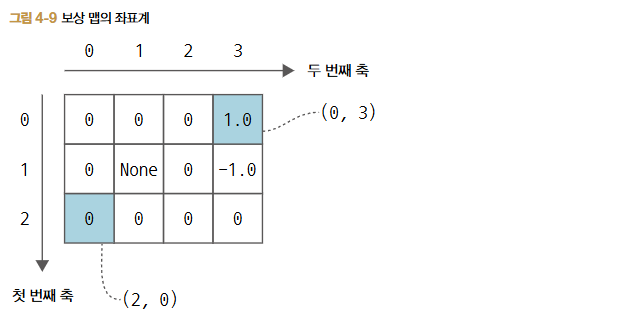

그리드월드의 세로축, 가로축 길이, 전체 모양 출력

In [6]:
env = GridWorld()

# env.height() 대신 괄호 없애고 사용
print(env.height)
print(env.width)
print(env.shape)

3
4
(3, 4)


그리드월드의 action 과 state 출력

In [8]:
for action in env.actions(): # 모든 행동에 순차적 접근 0 : 위 , 1: 아래, 2:왼, 3: 오
    print(action)

0
1
2
3


In [10]:
for state in env.states(): # 3X4 그리드월드의 모든 상태 출력
    print(state)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


그리드월드의 next_state 는 에이전트의 행동(위,아래,왼,오) 진행 후 벽, 장애물인가를 보고   
1. 다음 상태로 가든가
2. 현재 상태를 유지하든가

reward 함수는 $r(s,a,s') $ 처럼 reward(self, state, action, next_state) 인수로 받고 reward map에서 next state에 대한 보상을 받음.   
아래와 같이 (0,2) 좌표에서 오른쪽3 action을 취한 다음 상태의 보상은 1임.

In [12]:
state = (0,2)
action = 3
next_state = env.next_state(state, action)

r = env.reward(state, action, next_state)
print(r)

1.0


### 
그리드월드에서 render_v 를 통해 그리드월드가 어떻게 생겼는지 시각화해볼 수 있음

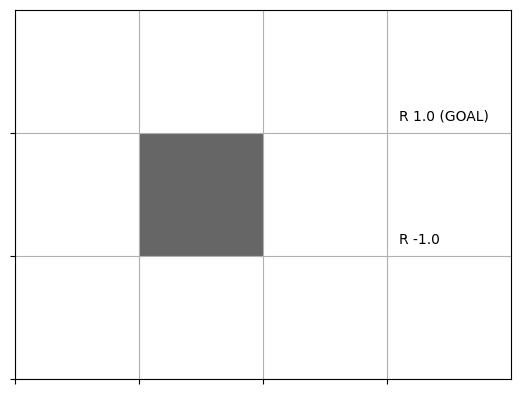

In [11]:
env = GridWorld()
env.render_v()

render_v 함수는 상태가치함수를 매개변수로 받아서 나중에 얼마나 해당 상태에서 에이전트 정책이나 행동이 잘 수행되고 있는가를 볼 수 있음.   
지금은 랜덤으로 가치함수 값을 넣어서 그려본 결과임

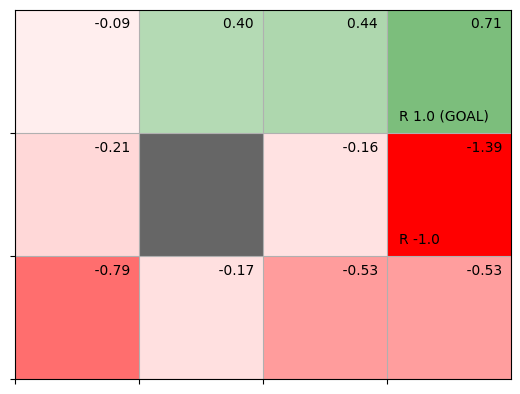

In [14]:
env = GridWorld()
V = {}
for state in env.states():
    V[state] = np.random.randn()
env.render_v(V)

# 
#### 4.2.2 defaultdict 사용법
- 우리 현재 목표는 벨만 방정식을 동적 프로그래밍의 반복적 정책 평가 알고리즘을 코딩으로 구현해보는 것임.
    1. 이를 위해 먼저 테크닉으로 가치 함수와 정책을 쉽게 구현할 수 있는 collections.defaultdict 를 알아보겠음.

현재까지는 아래와 같이 그냥 dictionary로 구현하였음.

In [16]:
env = GridWorld()
V = {} # 그냥 딕셔너리

# 딕셔너리 원소 초기화
for state in env.states():
    V[state] = 0
    
state = (1,2)
print(V[state])

0


위와 같이 딕셔너리로 사용하면 key 값을 먼저 선언해놔야함, 없으면 에러 출력   
만약 상태가 많아지면 초기화를 해야하는 작업이 번거로워짐.
- defaultdict(lambda:0) 은 key 값이 선언되어있지 않더라도 0으로 자동으로 초기화해놓음

In [17]:
from collections import defaultdict

env = GridWorld()
V = defaultdict(lambda:0)

state = (1,2)
print(V[state])

0


에이전트의 정책 역시 defaultdict로 구현 가능   
정책은 각 상태의 에이전트의 확률분포임. 그리고 모든 상태마다 위, 아래 , 왼, 오 4가지 경우가 25% 확률로 존재한다고해보면

In [18]:
pi = defaultdict(lambda : {0 : 0.25, 1 : 0.25, 2 : 0.25, 3: 0.25})

state = (0,1)
print(pi[state])

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


즉 정책은 상태를 key로 받아서 각 상태에서의 행동들의 확률분포 또한 딕셔너리로 표현

# 
#### 4.2.3 반복적 정책 평가 구현
먼저 갱신을 한 단계만 수행하는 코드 구현, eval_onestep() 함수는 아래 4개를 매개변수로 받음.
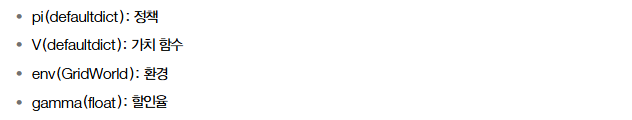

In [19]:
def eval_onestep(pi, V, env, gamma=0.9):
    for state in env.states(): # 1. 각 상태 접근
        if state == env.goal_state : # 2. 목표 상태에서의 가치 함수는 항상 0
            V[state] = 0
            continue
            
        action_probs = pi[state]
        new_V = 0
        
        # 3. 각 행동 접근
        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            # 4. 새로운 가치 함수
            new_V += action_prob * (r + gamma * V[next_state])
            
        V[state] = new_V
    return V

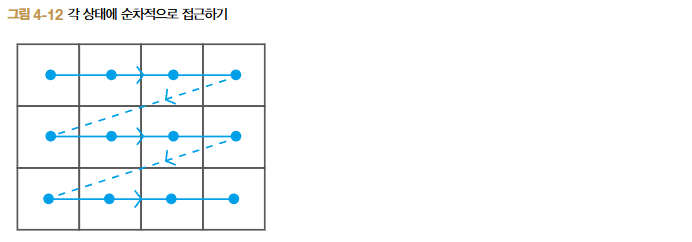

코드 4번 : 
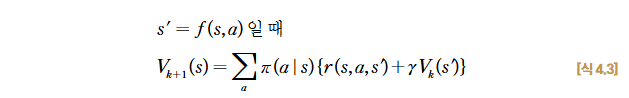

이제 eval_onestep() 함수로 가치가 한 단계 업데이트되므로 이를 반복하여 구현해보자

In [20]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
    while True :
        old_V = V.copy() # 갱신 전 가치 함수
        V = eval_onestep(pi, V, env, gamma)
        
        # 갱신된 양의 최댓값 계산
        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t :
                delta = t
                
        # 임계값과 비교
        if delta < threshold :
            break
    return V

구현

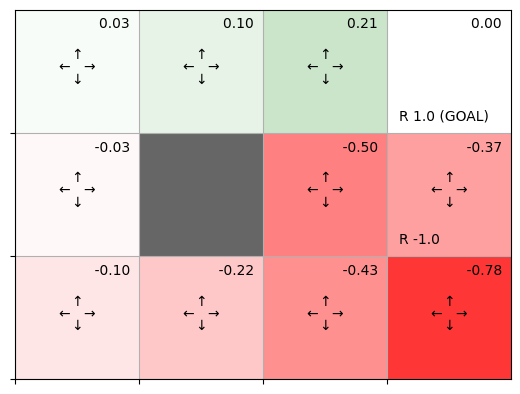

In [21]:
env = GridWorld()
gamma = 0.9 # 할인율
pi = defaultdict(lambda : {0 : 0.25, 1 : 0.25, 2 : 0.25, 3: 0.25}) # 정책
V = defaultdict(lambda : 0) # 가치함수

V = policy_eval(pi, V, env, gamma) # 반복적 정책 평가
env.render_v(V, pi)

- 해석 :
    1. 모든 상태에서 에이전트의 정책은 25%로 무작위임.
    2. 맨 왼쪽 아래(시작점)에서의 정책 가치 함수는 -0.1임. 
    3. 다른 정책 가치 함수와 비교하였을 때 조금 낮은 것을 볼 수 있음.
    4. 시작해서 폭탄도 맞고 할 확률이 더 크다는 의미이기도 함.
    5. 맨 위에 목표 지점 바로 왼쪽의 상태가치 값이 높은 것을 볼 수 있음

- 지금까지는 에이전트의 정책이 고정되어있는 상태에서 상태가치함수 값이 얼마인가를 본 것임.
- 우리는 정책이 고정되어있는 것이 아니라 좋은 정책을 찾아가야 하는 본질적인 문제가 남아 있음

# 
### 4.3 정책 반복법
 - 최적 정책을 벨만 최적 방정식을 만족하는 연립방정식으로 푸는 방법이 있었음.
 - 하지만 계산량이 너무 많음.
#### 아이디어 : 
임의의 정책을 주고 좀 더 좋은 좋은 정책으로 점진적 개선해나가보자   
마치 argmin$ x^2$ 은 0이라는 것을 알지만 임의의 값을 초기값으로 주고 점점 개선해나가는 것과 비슷함

#### 주의 : 
최적 정책은 각 상태에서 가장 좋은 행동 하나씩 나온다는 의미임.

#### 4.3.1 정책 개선
최적 정책 복습
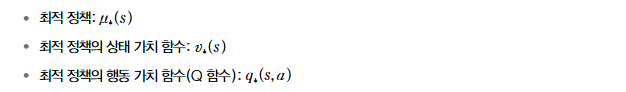
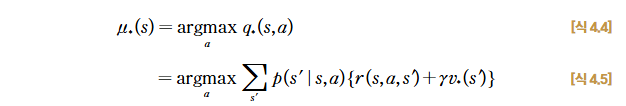

- 위 식은 국소적인 후보 중에서 최선의 행동을 선택해줌.
- 이러한 표현의 정책을 탐욕 정책 greedy policy 라고 함.

최적 정책을 모르므로 일단 초깃값으로 임의의 결정적 정책(즉 에이전트의 결정적 행동) $\mu$ 를 대입해보자
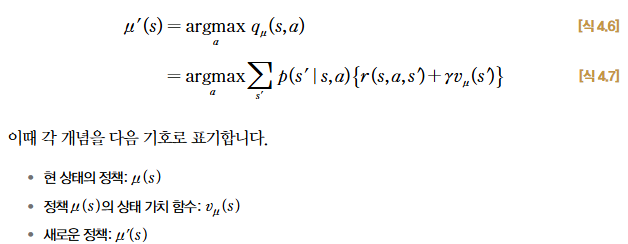

- 이러한 정책 갱신을 탐욕화 라고 부름.
- 모든 상태 $s$ 에서 $\mu(s)$ 와 $\mu(s')$ 가 같다면 이미 최적 정책이라는 것임.(다음 식을 만족하므로)
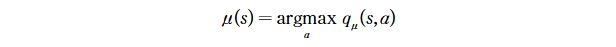

- 탐욕화의 결과로 정책이 갱신되면 항상 새로운 정책은 기존 정책보다 개선된다는 증명(정책 개선 정리 policy improvement theorem)
- 직관적으로 생각해보면 탐욕화는 모든 상태에서 상태가치함수가 가장 큰 값을 가지는 행동을 선택하므로 
- 모든 상태 $s$ 에서 $v_{u'}(s) >= v_u(s)$ 가 성립
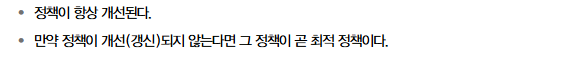

# 
#### 4.3.2 평가와 개선 반복
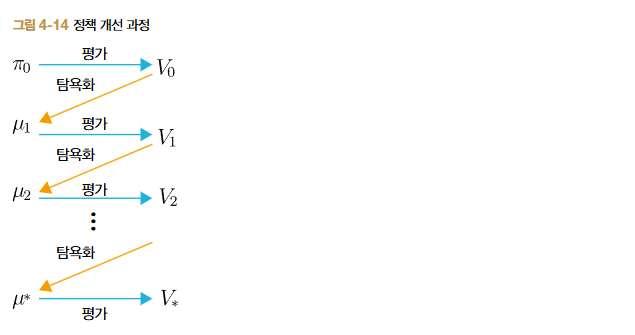
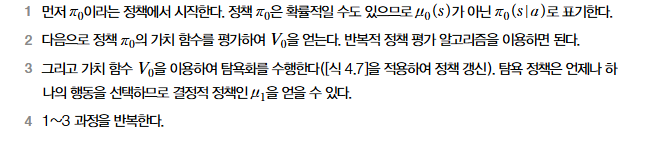